In [142]:
import os, glob
import random
from PIL import Image

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [143]:
# 이미지 크기 28*28로 변경

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
    
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

resize_images(image_dir_path + "/rock")
resize_images(image_dir_path + "/scissor")
resize_images(image_dir_path + "/paper")

291  images to be resized.
291  images resized.
400  images to be resized.
400  images resized.
400  images to be resized.
400  images resized.


In [144]:
def load_data(img_path, number_of_data=1200):
    img_size = 28
    color = 3
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0
        idx += 1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1
        idx += 1

    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2
        idx += 1

    print("이미지 개수:", idx)
    return imgs, labels
    
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0

print(x_train_norm.shape, y_train.shape)

학습 데이터 이미지 개수: 1091
(1200, 28, 28, 3) (1200,)


In [145]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 4806      
_________________________________________________________________
dense_43 (Dense)             (None, 3)               

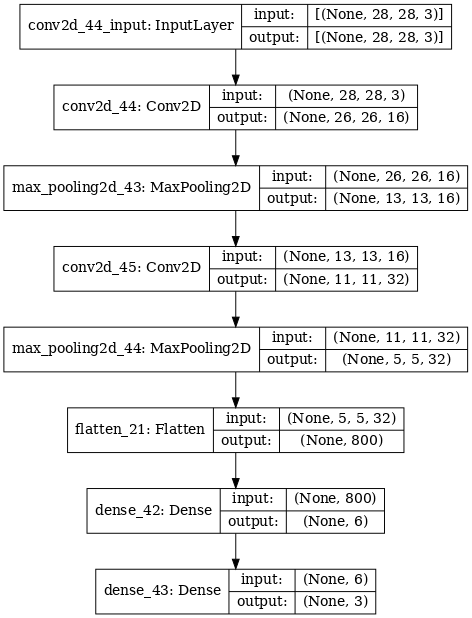

In [146]:
plot_model(model, show_shapes=True, dpi=70)

In [149]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=30)

Epoch 1/30
38/38 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.8552
Epoch 2/30
38/38 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8817
Epoch 3/30
38/38 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8668
Epoch 4/30
38/38 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8916
Epoch 5/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.9020
Epoch 6/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.8898
Epoch 7/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.9106
Epoch 8/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.8851
Epoch 9/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.9130
Epoch 10/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9056
Epoch 11/30
38/38 [

In [150]:
# test
test_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

resize_images(test_path + "/rock")
resize_images(test_path + "/scissor")
resize_images(test_path + "/paper")

(x_test, y_test) = load_data(test_path)
x_test_norm = x_test / 255.0

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습 데이터 이미지 개수: 300


In [151]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

38/38 - 0s - loss: 1.5533 - accuracy: 0.8267


In [152]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

예측 확률 븐포:  [0.0127698  0.9855376  0.00169264]
라벨:  0
예측 결과:  1


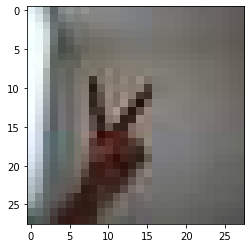

예측 확률 븐포:  [7.4355870e-01 2.5644013e-01 1.1450784e-06]
라벨:  1
예측 결과:  0


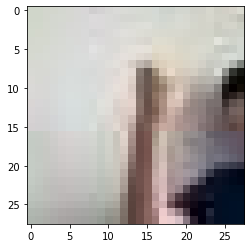

예측 확률 븐포:  [0.00803224 0.98810905 0.00385875]
라벨:  0
예측 결과:  1


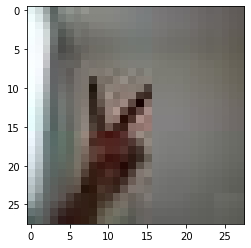

예측 확률 븐포:  [9.9052507e-01 9.4749629e-03 3.5053607e-10]
라벨:  1
예측 결과:  0


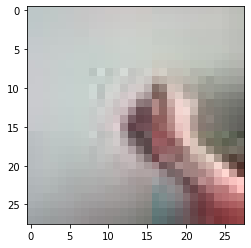

예측 확률 븐포:  [0.09496139 0.85417235 0.05086624]
라벨:  2
예측 결과:  1


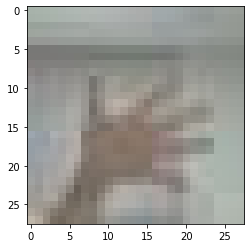

In [153]:
wrong_predict_list = []

for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측 확률 븐포: ", str(predicted_result[n]))
    print("라벨: ", str(y_test[n]))
    print("예측 결과: ", str(predicted_labels[n]))
    
    plt.imshow(x_test_norm[n])
    plt.show()